<a href="https://colab.research.google.com/github/Zelkova46/kenkyushimasu_Nikkei225/blob/main/bissmillah_Nikkei225_weekly_forecastingNclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Roadmap penelitian

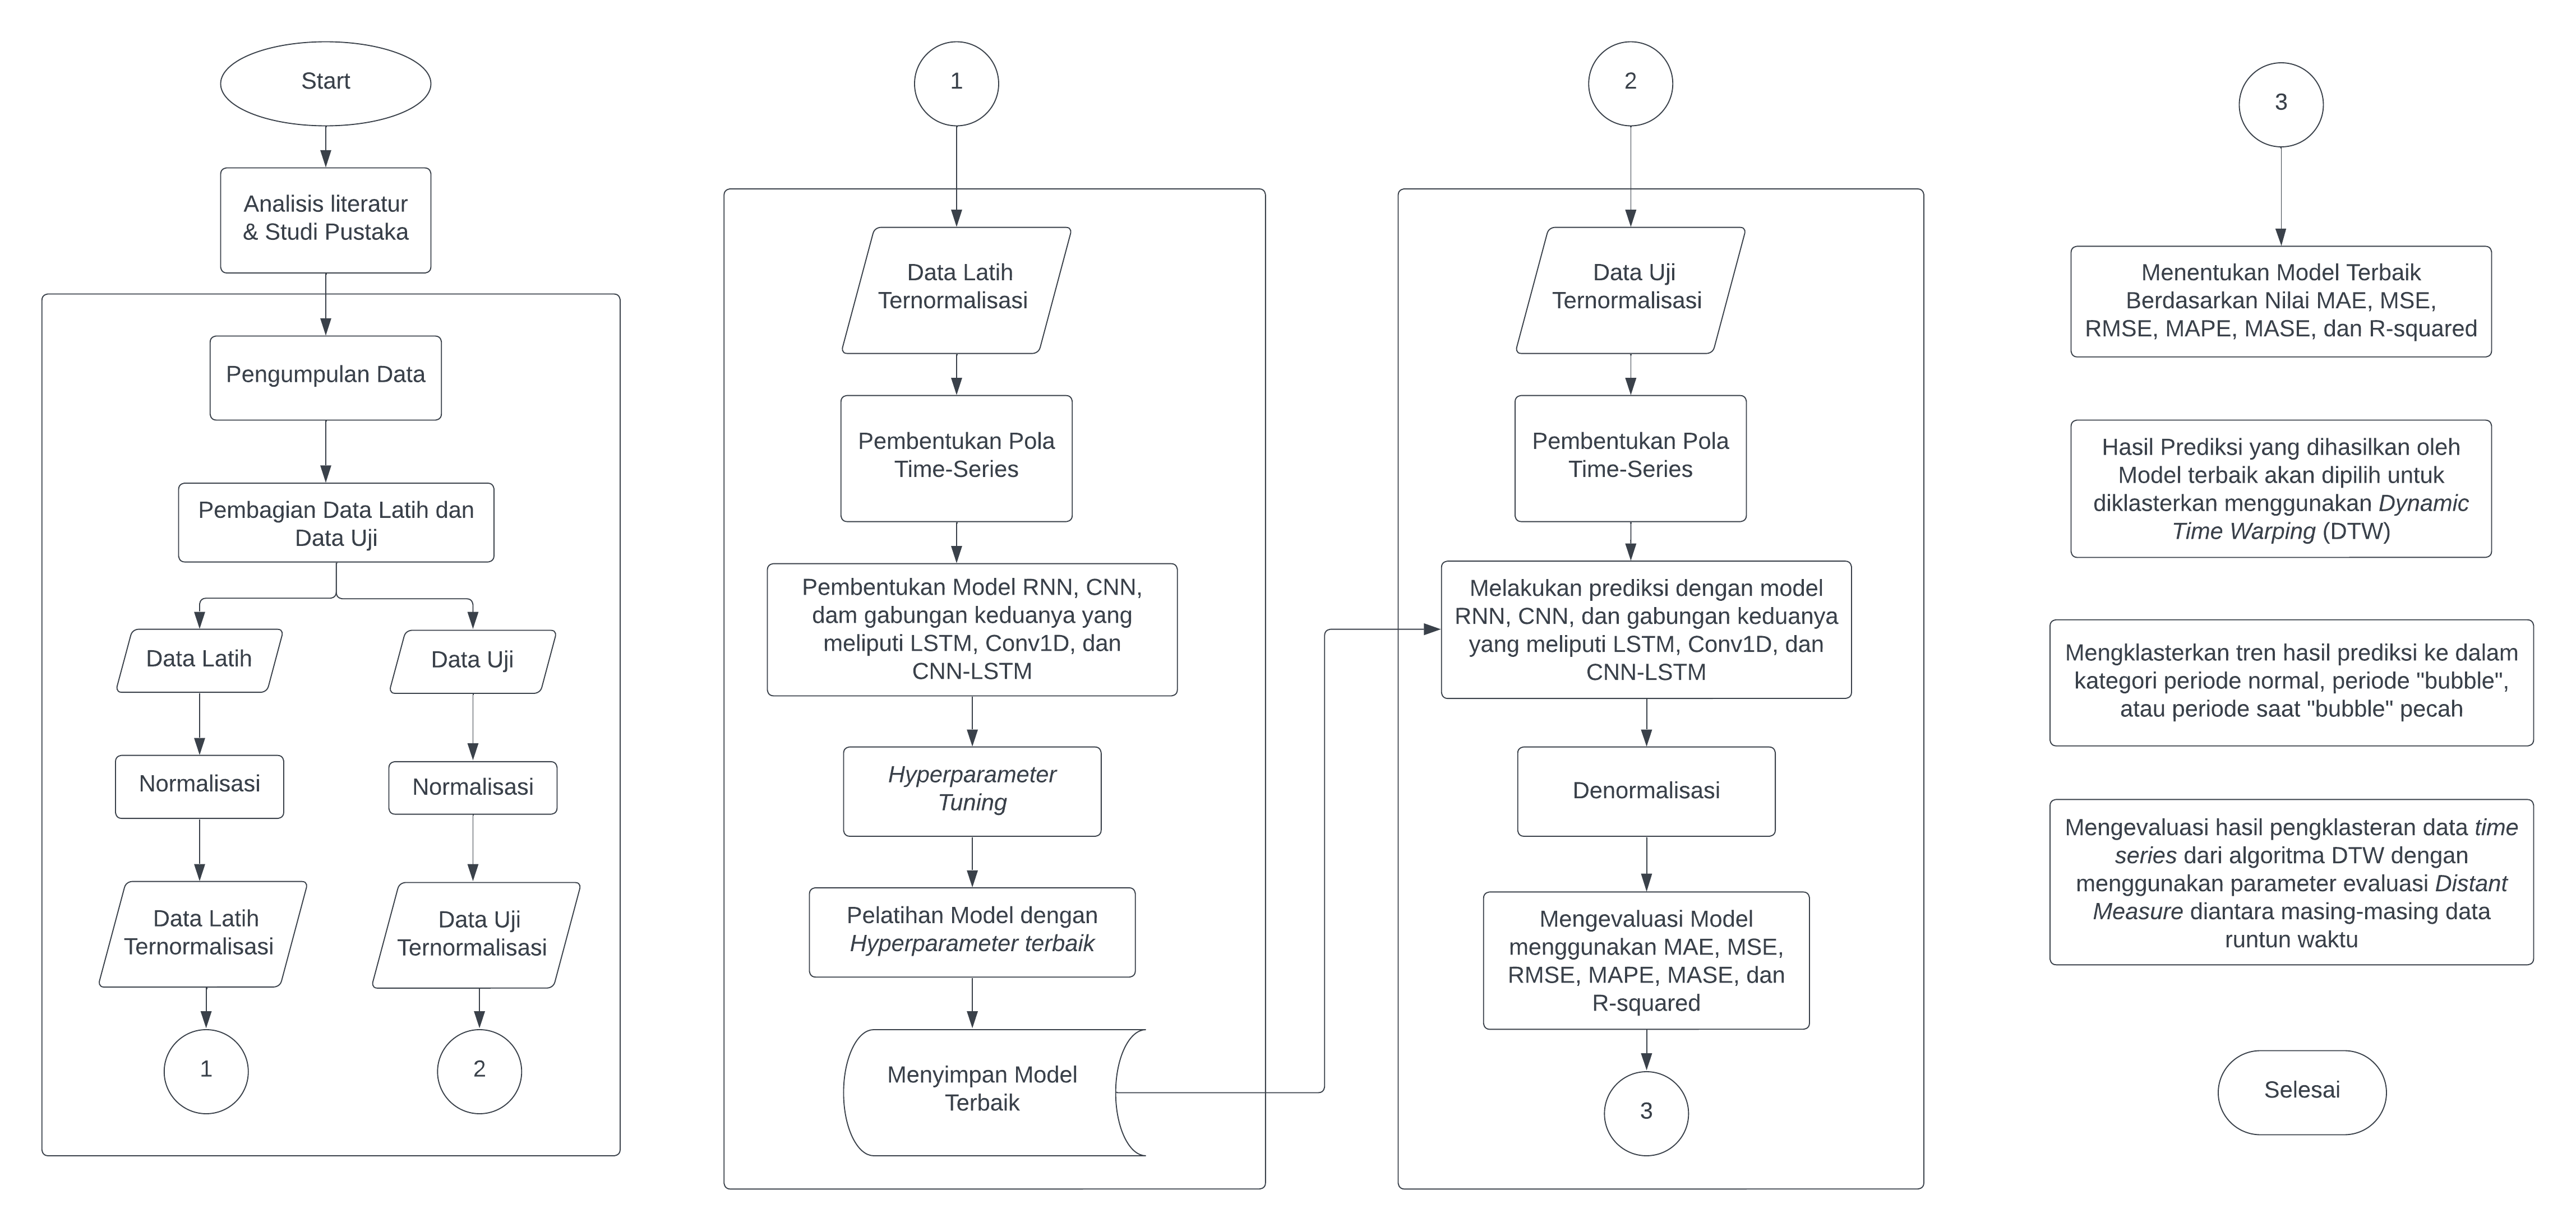

## Get Data

Sumber data: https://finance.yahoo.com/quote/%5EN225?p=%5EN225


mendownload data harga saham Nikkei225 dengan interval satu minggu dari tahun 1968 sampai 2023

In [ ]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/nikkei225/%5EN225.csv

--2024-02-11 08:24:16--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/nikkei225/%5EN225.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231558 (226K) [text/plain]
Saving to: ‘^N225.csv’

^N225.csv           100%[===================>] 226.13K  --.-KB/s    in 0.03s   

2024-02-11 08:24:16 (8.05 MB/s) - ‘^N225.csv’ saved [231558/231558]



## importing time series with pandas

In [ ]:
# import dengan pandas
import pandas as pd
# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("/content/^N225.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-27,33710.031250,33811.410156,33161.070313,33431.511719,33431.511719,495800000.0
2023-12-04,33318.070313,33452.128906,32205.380859,32307.859375,32307.859375,513900000.0
2023-12-11,32665.089844,33172.128906,32515.039063,32970.550781,32970.550781,578400000.0
2023-12-18,32769.230469,33824.058594,32541.230469,33169.050781,33169.050781,516200000.0
2023-12-25,33414.511719,33755.750000,33181.359375,33464.171875,33464.171875,383200000.0


In [ ]:
nikkei225_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1968-01-01,1266.270020,1282.380005,1266.270020,1282.380005,1282.380005,0.0
1968-01-08,1283.530029,1316.890015,1283.530029,1314.469971,1314.469971,0.0
1968-01-15,1314.979980,1322.989990,1312.739990,1312.739990,1312.739990,0.0
1968-01-22,1306.489990,1313.180054,1304.449951,1313.180054,1313.180054,0.0
1968-01-29,1306.609985,1318.109985,1306.609985,1318.109985,1318.109985,0.0


In [ ]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 1968-01-01 to 2023-12-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2919 non-null   float64
 1   High       2919 non-null   float64
 2   Low        2919 non-null   float64
 3   Close      2919 non-null   float64
 4   Adj Close  2919 non-null   float64
 5   Volume     2919 non-null   float64
dtypes: float64(6)
memory usage: 159.8 KB


## mengecek missing data

In [ ]:
nikkei225_df.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [ ]:
nikkei225_df.isnull().sum()

Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [ ]:
print("Total missing data : {}".format(nikkei225_df.isnull().sum().sum()))

Total missing data : 18


## menghapus semua data yang memiliki nilai NULL

In [ ]:
nikkei225_df = nikkei225_df.dropna()
nikkei225_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1968-01-01,1266.270020,1282.380005,1266.270020,1282.380005,1282.380005,0.0
1968-01-08,1283.530029,1316.890015,1283.530029,1314.469971,1314.469971,0.0
1968-01-15,1314.979980,1322.989990,1312.739990,1312.739990,1312.739990,0.0
1968-01-22,1306.489990,1313.180054,1304.449951,1313.180054,1313.180054,0.0
1968-01-29,1306.609985,1318.109985,1306.609985,1318.109985,1318.109985,0.0


In [ ]:
len(nikkei225_df)

2919

In [ ]:
nikkei225_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Visualisasi Data

In [ ]:
# visualisasi date dan closing price

nikkei225_close = pd.DataFrame(nikkei225_df["Close"]).rename(columns={"Close": "Closing Price (Yen)"})
nikkei225_close.tail()

,Closing Price (Yen)
Date,
2023-11-27,33431.511719
2023-12-04,32307.859375
2023-12-11,32970.550781
2023-12-18,33169.050781
2023-12-25,33464.171875


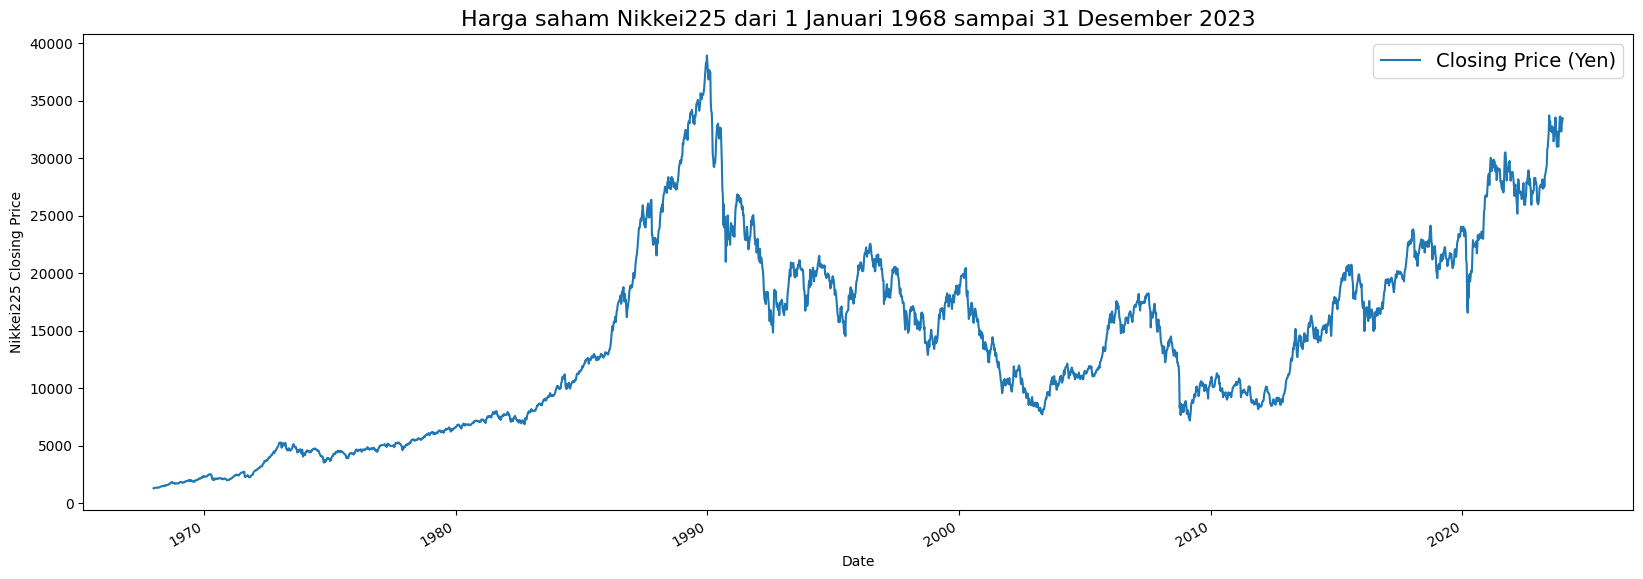

In [ ]:
#memvisualisasikan data

import matplotlib.pyplot as plt
nikkei225_close.plot(figsize = (20,7))
plt.ylabel("Nikkei225 Closing Price")
plt.title("Harga saham Nikkei225 dari 1 Januari 1968 sampai 31 Desember 2023", fontsize = 16)
plt.legend(fontsize = 14)

## Import data time seres dengan Python CSV modul

In [ ]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps = []
saham_nikkei225_penutupan = []

with open("/content/^N225.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[4] == "null":
      continue
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) #membaca tanggal sbg DATE
    saham_nikkei225_penutupan.append(float(line[4])) #membaca closing price Nikkei225


In [ ]:
len(timesteps)

2919

In [ ]:
# panggil 10 record data pertama
timesteps[:10], saham_nikkei225_penutupan[:10]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 1, 8, 0, 0),
  datetime.datetime(1968, 1, 15, 0, 0),
  datetime.datetime(1968, 1, 22, 0, 0),
  datetime.datetime(1968, 1, 29, 0, 0),
  datetime.datetime(1968, 2, 5, 0, 0),
  datetime.datetime(1968, 2, 12, 0, 0),
  datetime.datetime(1968, 2, 19, 0, 0),
  datetime.datetime(1968, 2, 26, 0, 0),
  datetime.datetime(1968, 3, 4, 0, 0)],
 [1282.380005,
  1314.469971,
  1312.73999,
  1313.180054,
  1318.109985,
  1330.72998,
  1334.219971,
  1348.660034,
  1355.48999,
  1321.410034])

# !!!PENTING!!! Merubah data ke dalam format numpy array

In [ ]:
type(saham_nikkei225_penutupan)

list

In [ ]:
type(timesteps)

list

In [ ]:
# merubah list menjadi numpy array dengan menggunakan numpy
import numpy as np
timesteps = np.array(timesteps)
saham_nikkei225_penutupan = np.array(saham_nikkei225_penutupan)

In [ ]:
type(saham_nikkei225_penutupan)

numpy.ndarray

In [ ]:
type(timesteps)

numpy.ndarray

## Visualisasi plot dari read data dengan CSV reader python

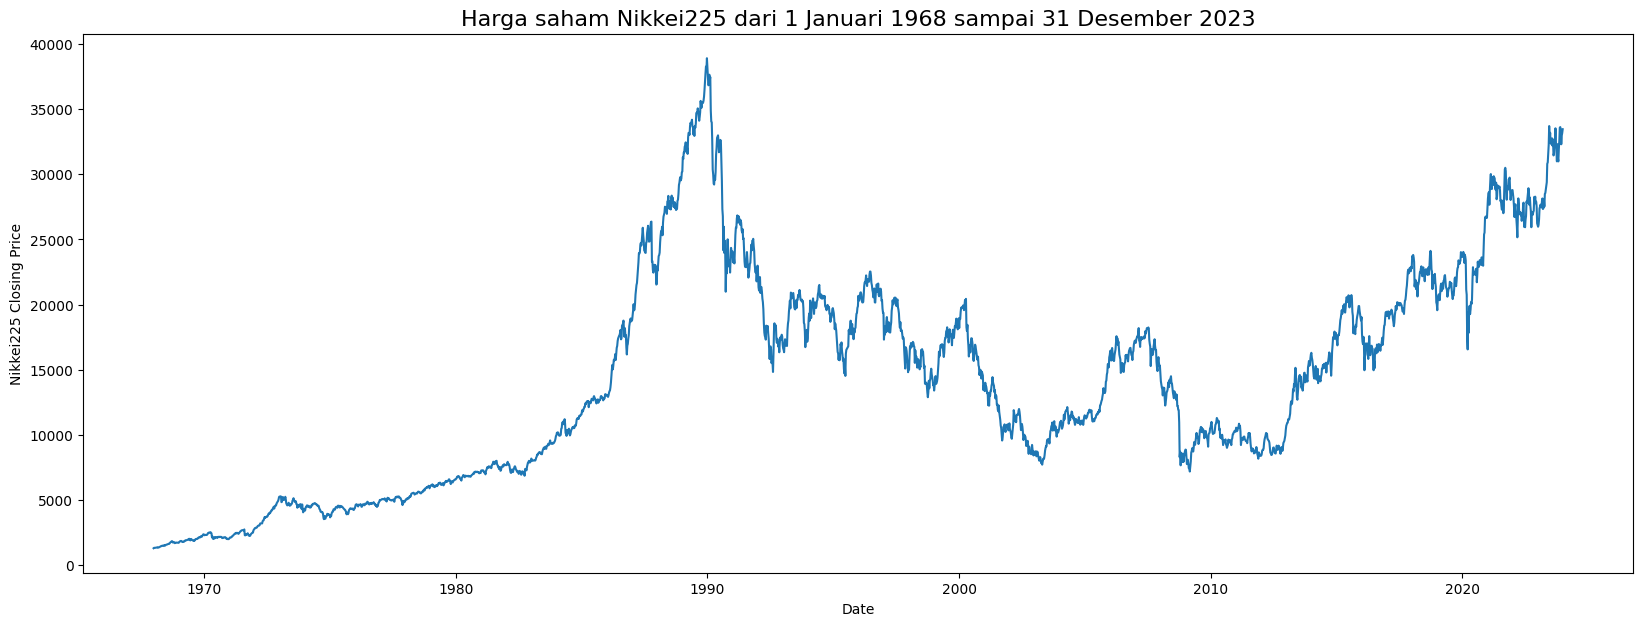

In [ ]:
# plot from csv
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (20,7))
plt.plot(timesteps, saham_nikkei225_penutupan)
plt.ylabel("Nikkei225 Closing Price")
plt.title("Harga saham Nikkei225 dari 1 Januari 1968 sampai 31 Desember 2023", fontsize = 16)
plt.xlabel("Date");

## Data formatting #1: Membuat train dan test sets untuk data time series

kedepannya variable Nikkei yang dipakai yang saham_nikkei225_penutupan. Date nya adalah timesteps

In [ ]:
saham_nikkei225_penutupan[:10], timesteps[:10]

(array([1282.380005, 1314.469971, 1312.73999 , 1313.180054, 1318.109985,
        1330.72998 , 1334.219971, 1348.660034, 1355.48999 , 1321.410034]),
 array([datetime.datetime(1968, 1, 1, 0, 0),
        datetime.datetime(1968, 1, 8, 0, 0),
        datetime.datetime(1968, 1, 15, 0, 0),
        datetime.datetime(1968, 1, 22, 0, 0),
        datetime.datetime(1968, 1, 29, 0, 0),
        datetime.datetime(1968, 2, 5, 0, 0),
        datetime.datetime(1968, 2, 12, 0, 0),
        datetime.datetime(1968, 2, 19, 0, 0),
        datetime.datetime(1968, 2, 26, 0, 0),
        datetime.datetime(1968, 3, 4, 0, 0)], dtype=object))

membuat train & test sets untuk time series (split dengan cara yang benar)


In [ ]:
len(nikkei225_close)

2919

In [ ]:
# membuat pembagian train dan test dengan benar untuk data time series

split_size = int(0.8 * len(nikkei225_close)) #80% train dan 20% test

# Membuat train data didefinisikan kepada data2 sebelum split
X_train, y_train = timesteps[:split_size], saham_nikkei225_penutupan[:split_size]

# Membuat test data untuk data2 yang ada setelah split
X_test, y_test = timesteps[split_size:], saham_nikkei225_penutupan[split_size:]


In [ ]:
# ukuran train dan test
len(X_train), len(X_test), len(y_train), len(y_test)

(2335, 584, 2335, 584)

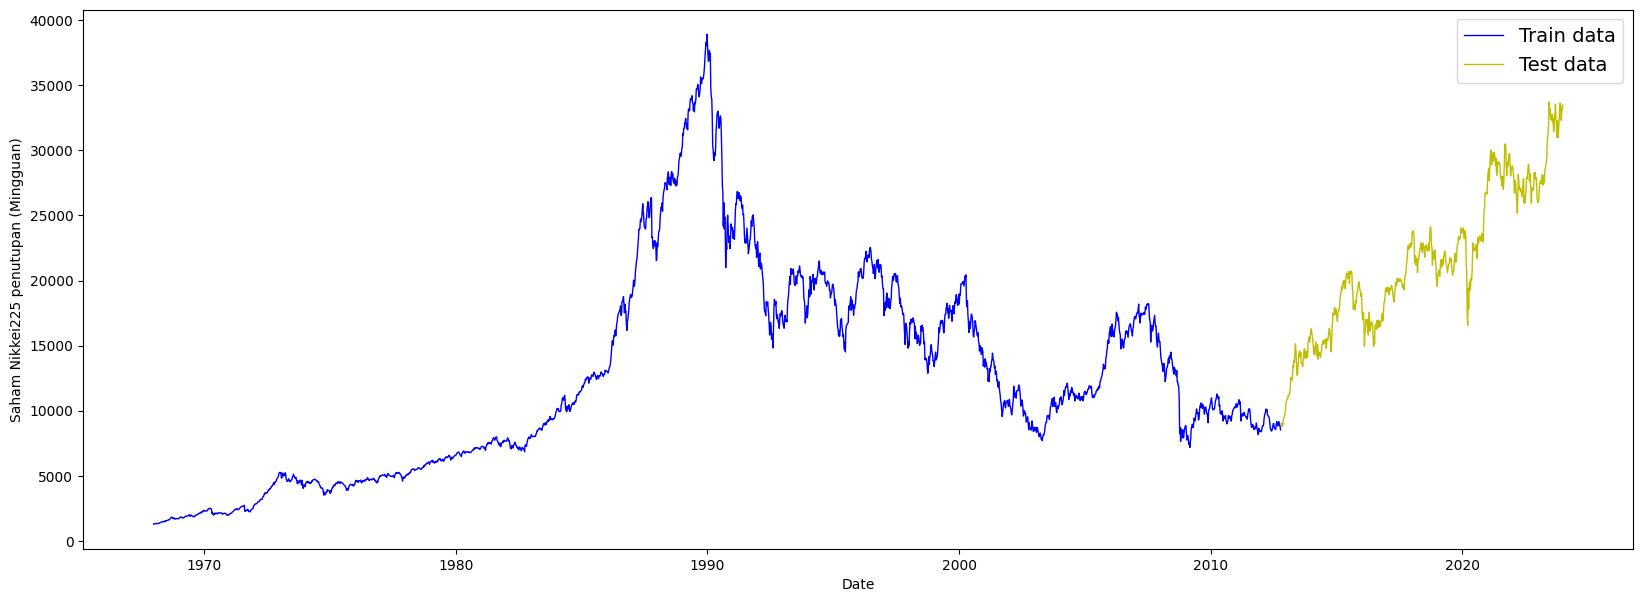

In [ ]:
# plot untuk visualisasi data split train dan test

plt.figure(figsize=(20,7))
plt.plot(X_train, y_train, linewidth=1, color = "b", label = "Train data")
plt.plot(X_test, y_test, linewidth = 1, color = "y", label = "Test data")
plt.xlabel("Date")
plt.ylabel("Saham Nikkei225 penutupan (Mingguan)")
plt.legend(fontsize = 14)
plt.show()

## Membuat fungsi untuk visualisasi (plotting)


In [ ]:
# membuat fungsi untuk menggambar data time series

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Plots timesteps (a series of points in time) against values (a series  of values across timesteps).

  Parameters
  -------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Time")
  plt.ylabel("Saham Nikkei225 Penutupan (harian)")
  if label:
    plt.legend(fontsize = 14) #make label bigger
  plt.grid(True)


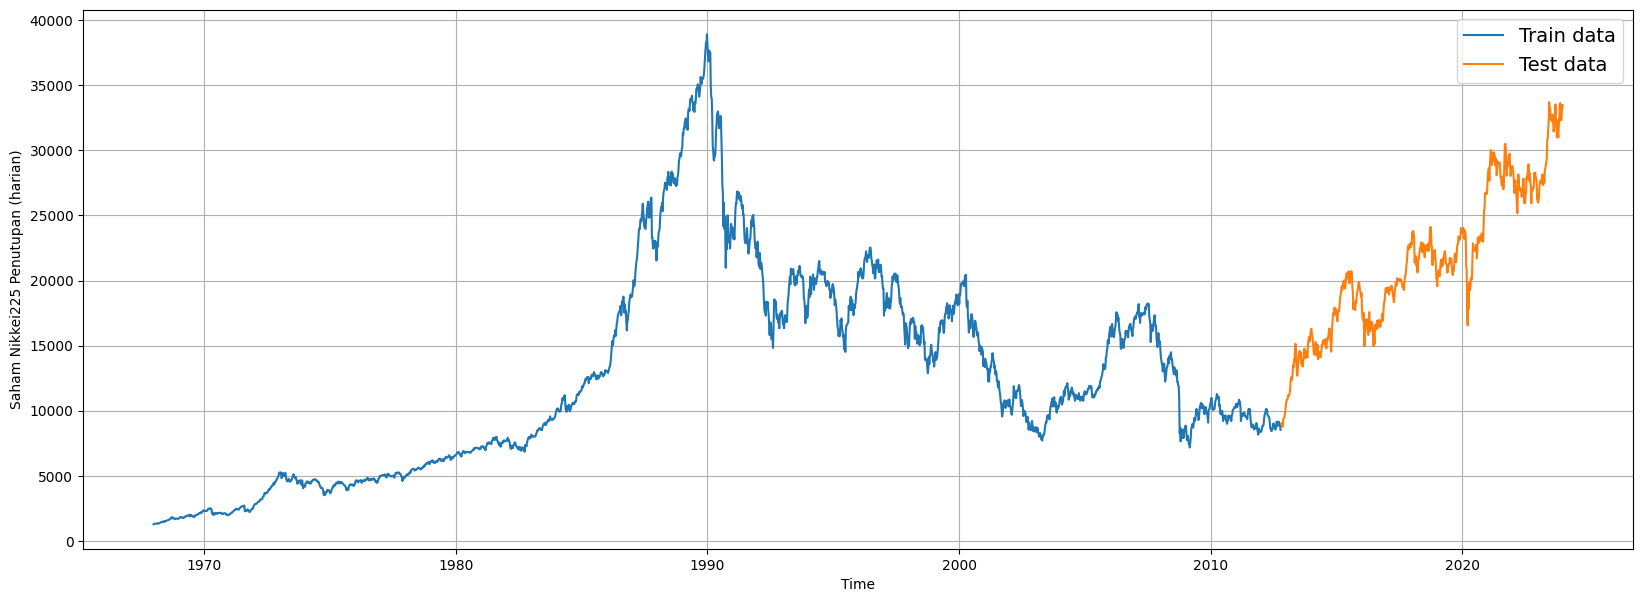

In [ ]:
# Test out plotting function
plt.figure(figsize = (20,7))
plot_time_series(timesteps = X_train, values = y_train, format = "-", label = "Train data")
plot_time_series(timesteps = X_test, values = y_test, format = "-", label = "Test data")

# Modelling Experiments


We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.


Terms to be familiar with:


Horizon = number of timesteps into the future we're going to predict
Window size = number of timesteps we're going to use to predict horizon
Modelling experiments we're running:


* 1. Naïve model (baseline)
* 2. Dense model, horizon = 1, window = 7
* 3. Same as 1, horizon = 1, window = 30
* 4. Same as 1, horizon = 7, window = 30
* 5. Conv1D
* 6. LSTM
* 7. Same as 1 (but with multivariate data)
* 8. N-BEATs Algorithm
* 9. Ensemble (multiple models optimized on different loss functions)
* 10. Future prediction model (model to predict future values)
* 11. Same as 1 (but with turkey 🦃 data introduced)


## Model 0 : Naive Forecast (baseline)

Rumus akan menjadi seperti berikut:

$$\hat{y}_{t} = y_{t-1}$$

artinya: prediksi pada timestep t (y-hat) sama dengan nilai pada timestep t-1 (previous timstep). ini berlaku untuk horizon dengan nilai 1

In [ ]:
# Membuat Naive forecast

naive_forecast = y_test[:-1] #hasil prediksi dengan menggunakan naive forecast

y_test[-10:], naive_forecast[-10:]

(array([30991.689453, 31949.890625, 32568.109375, 33585.199219,
        33625.53125 , 33431.511719, 32307.859375, 32970.550781,
        33169.050781, 33464.171875]),
 array([31259.359375, 30991.689453, 31949.890625, 32568.109375,
        33585.199219, 33625.53125 , 33431.511719, 32307.859375,
        32970.550781, 33169.050781]))

In [ ]:
len(y_test), len(naive_forecast)

(584, 583)

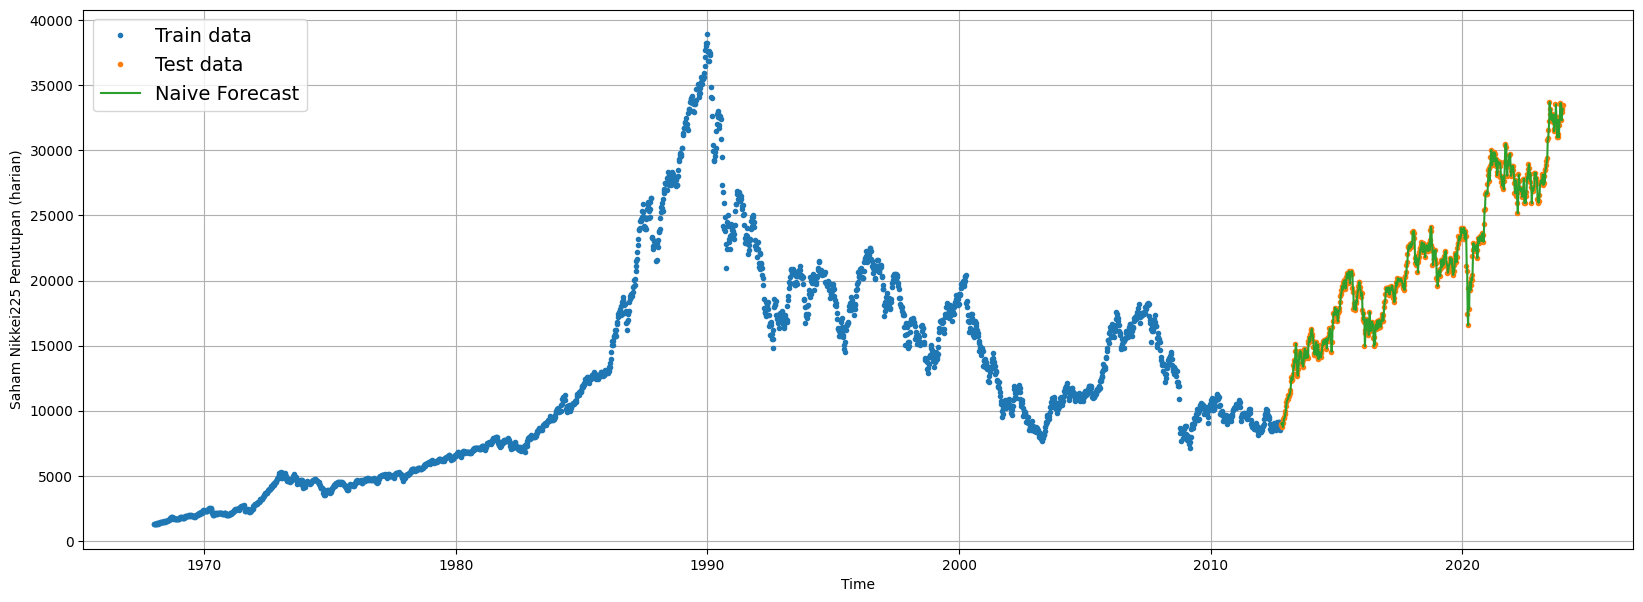

In [ ]:
# plot naive forecast
plt.figure(figsize = (20,7))
plot_time_series(timesteps = X_train, values = y_train, label = "Train data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test data")
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format = "-", label = "Naive Forecast")

In [ ]:
X_test[1]

datetime.datetime(2012, 10, 22, 0, 0)

In [ ]:
type(X_test[10])

datetime.datetime

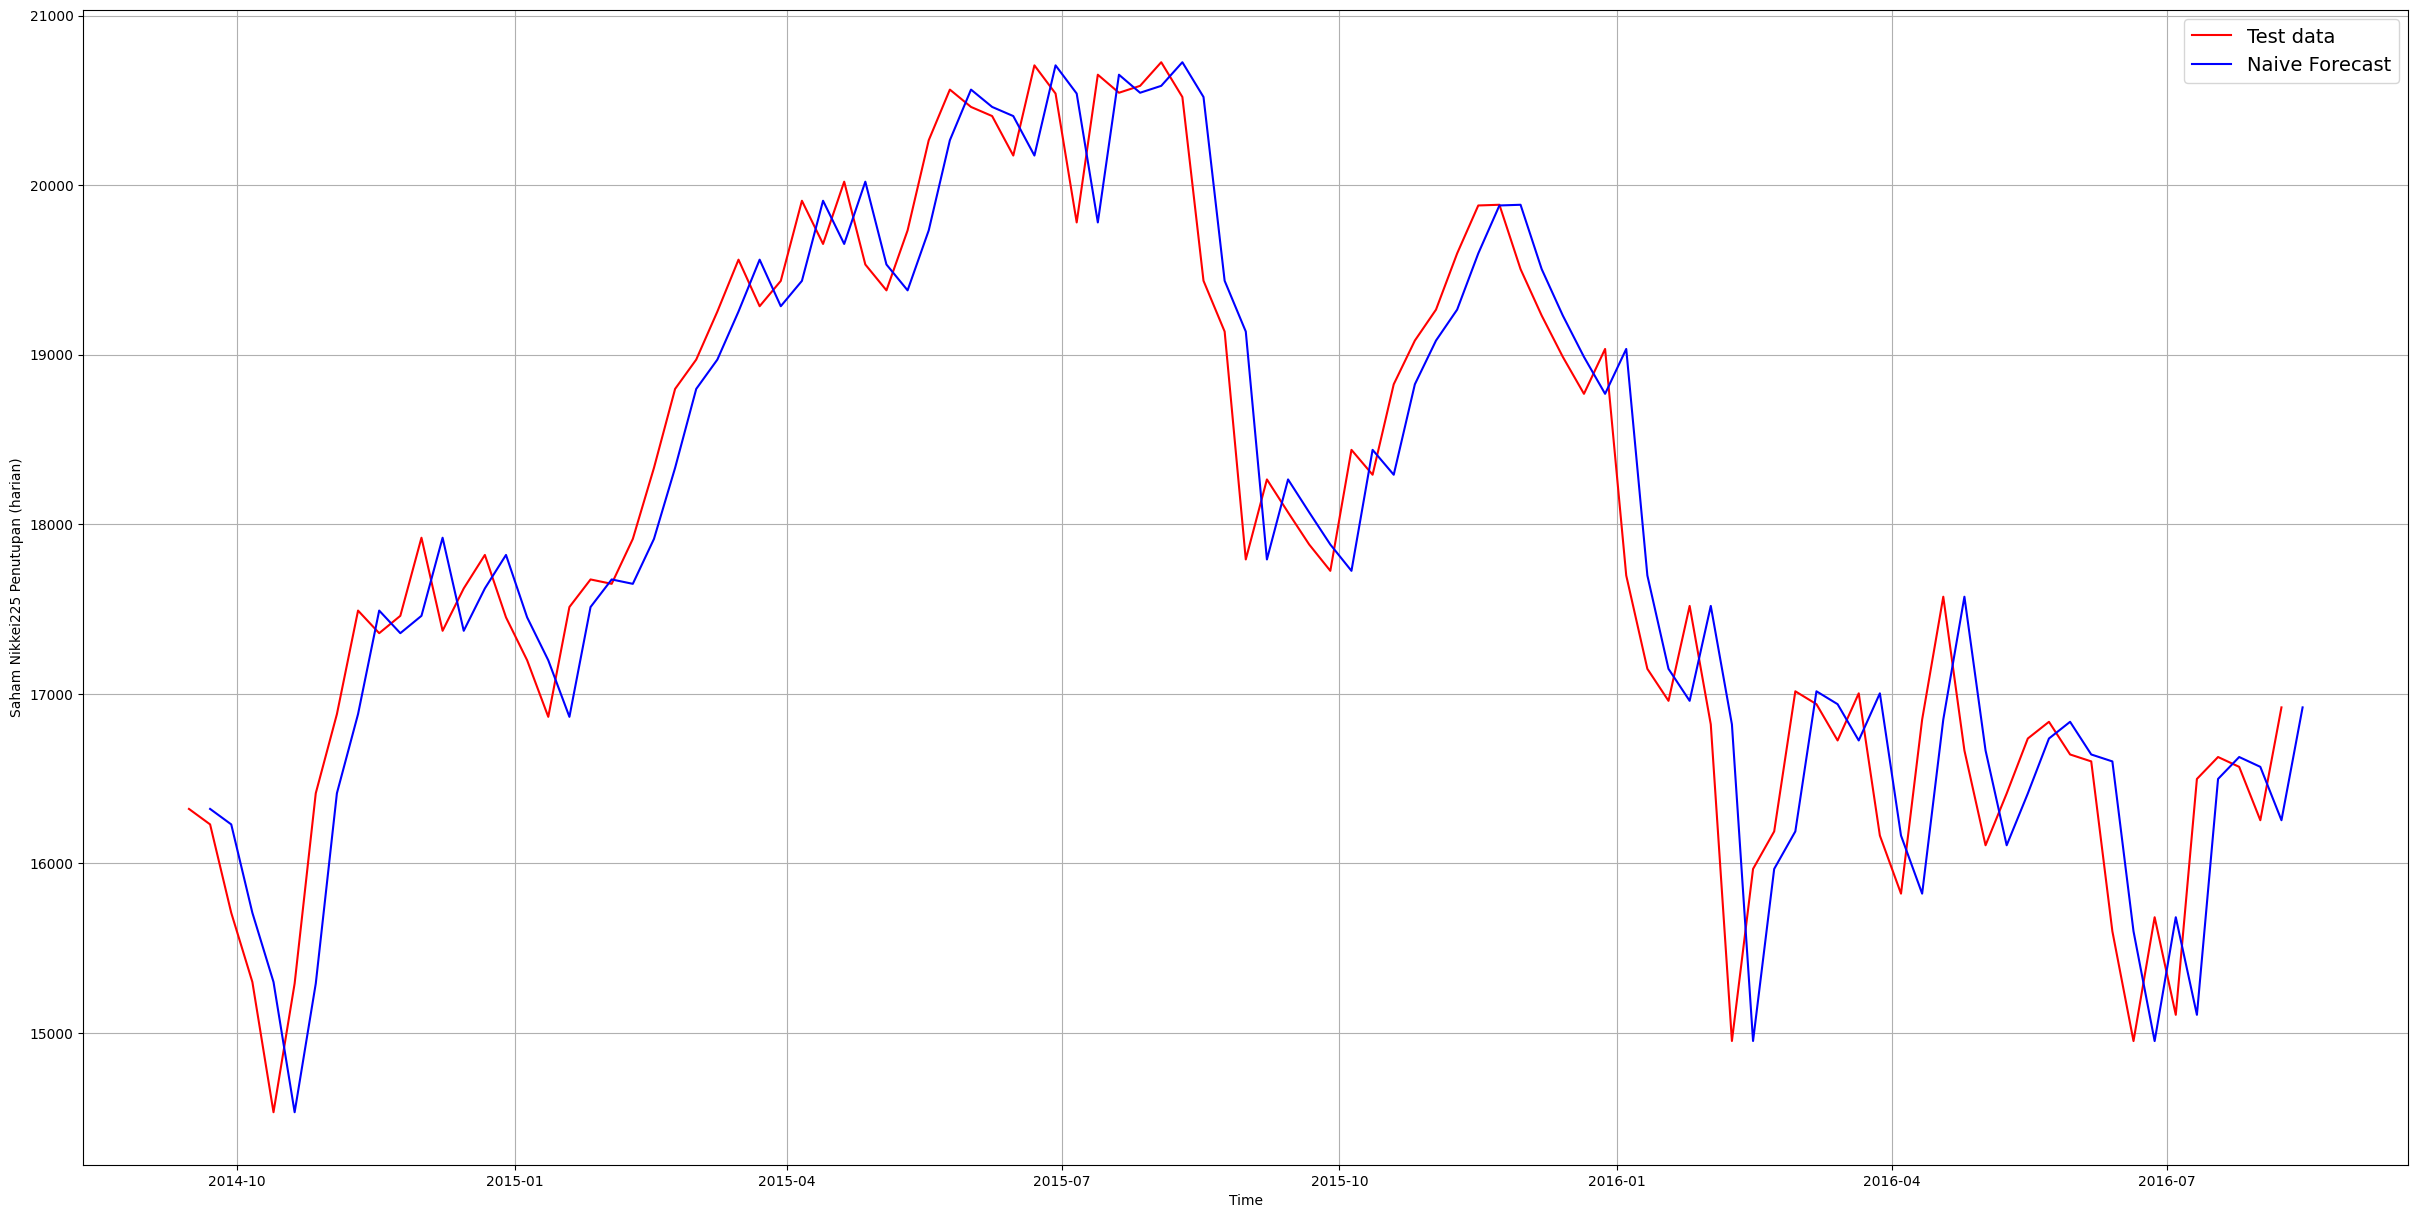

In [ ]:
# plot naive forecast
plt.figure(figsize = (30,15))
#plot_time_series(timesteps = X_train, values = y_train, label = "Train data")
plot_time_series(timesteps = X_test, values = y_test,start = 100, end = 200, format = "-", label = "Test data", color = "red")
plot_time_series(timesteps = X_test[1:], values = naive_forecast, start =100, end = 200, format = "-", label = "Naive Forecast", color = "blue")

In [ ]:
X_test[100:110]

array([datetime.datetime(2014, 9, 15, 0, 0),
       datetime.datetime(2014, 9, 22, 0, 0),
       datetime.datetime(2014, 9, 29, 0, 0),
       datetime.datetime(2014, 10, 6, 0, 0),
       datetime.datetime(2014, 10, 13, 0, 0),
       datetime.datetime(2014, 10, 20, 0, 0),
       datetime.datetime(2014, 10, 27, 0, 0),
       datetime.datetime(2014, 11, 3, 0, 0),
       datetime.datetime(2014, 11, 10, 0, 0),
       datetime.datetime(2014, 11, 17, 0, 0)], dtype=object)

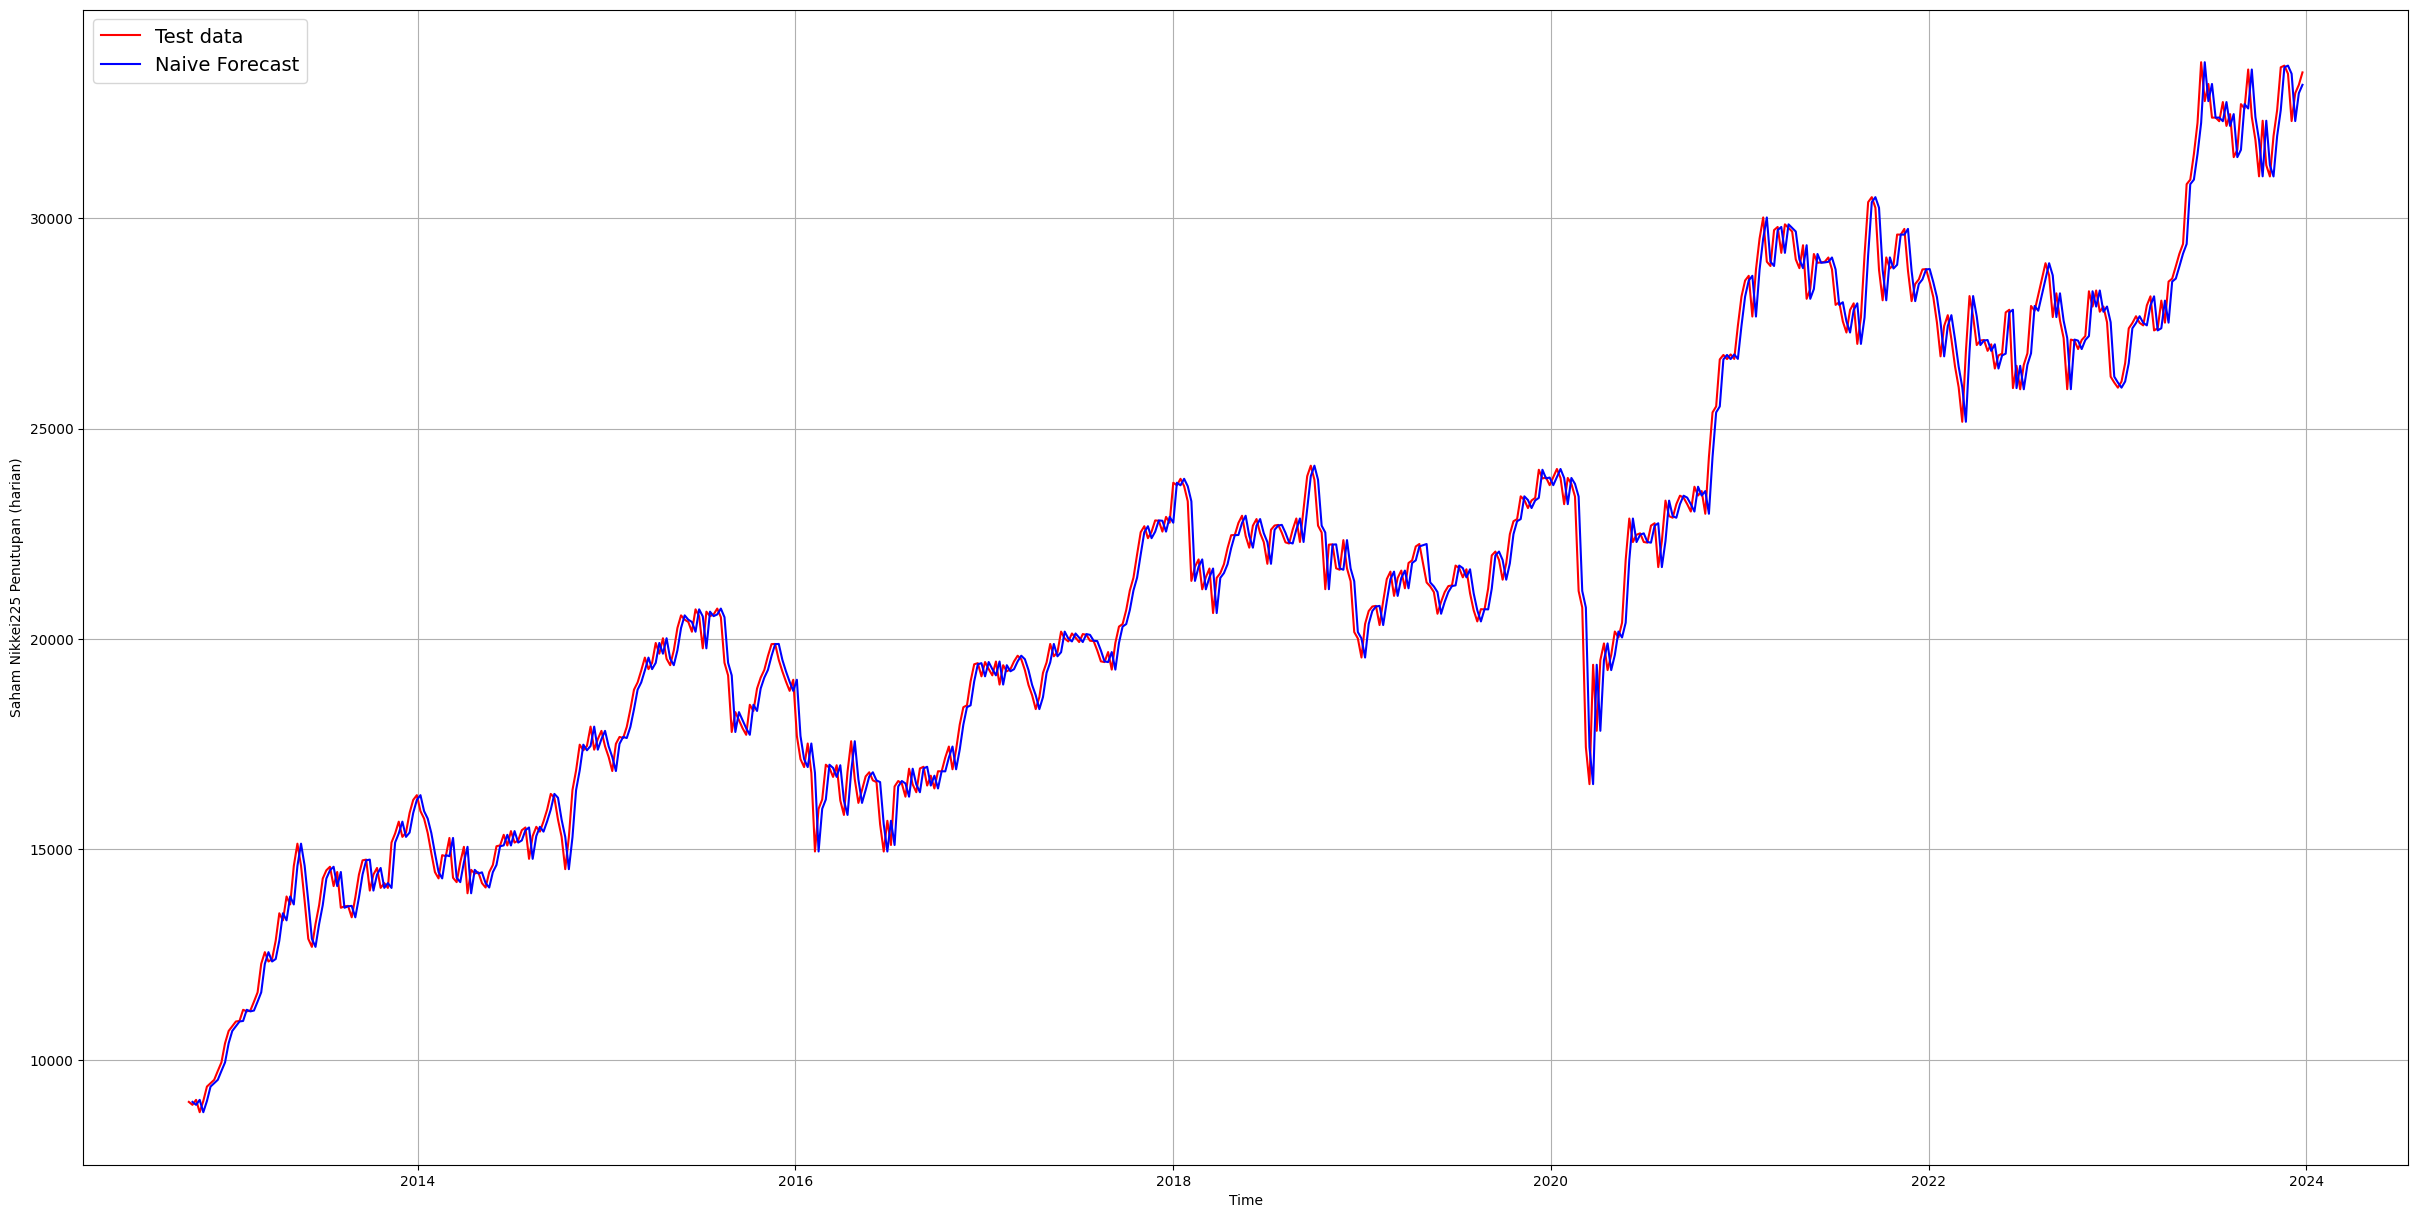

In [ ]:
# plot naive forecast
plt.figure(figsize = (30,15))
#plot_time_series(timesteps = X_train, values = y_train, label = "Train data")
plot_time_series(timesteps = X_test, values = y_test, format = "-", label = "Test data", color = "red")
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format = "-", label = "Naive Forecast", color = "blue")

In [ ]:
# BIAR GA BINGUNG MENDING MAKE VARIABEL YANG SATU2 AJA (TENTUIN MAU MASUKKIN DATA PAKE PANDAS read_csv() ATAU MODUL READ CSV DARI PYTHON)

🛠 Exercise: Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term augoregressive come up?

## Melakukan evaluasi time series model

memprediksi masalah regresi. Untuk masalah regeresi metrik evaluasi yang digunakan adalah metrik regression.

Hal utama yang ingin dievaluasi adalah bagaimana hasil prediksi dari model (y_pred) dibandingkan dengan nilai sebenarnya (y_true)

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error (menurut hyndman dan koehler tidak disarankan untuk dipakai), tapi ini juga sering dipakai di kompetisi2 spt M-competition. Ini ada papernya yang bilang jangan make sMAPE jadi masukkin skripsi jangan make sMAPE dan batasan masalahnya hapus yang bagian sMAPE. judul paper ada di buku digital Forecasting: Principles and Practice.
* MASE - mean absolute scaled error
yang MASE ini bagus karena dapat mengukur apakan prediksi model lebih baik dari naive forecast atau tidak. saat scaled error > 1 maka prediksi lebih bukur dari naive, saat < 1 lebih baik dari naive. saat = 1 maka prediksi adalah naive. Ada dua versi dari MASE: MASE untuk seasonal naive forecast dan naive forecast biasa. Note: Nikkei225 bukan seasonal data karena termasuk ke dalam open market sama seperti bitcoin

untuk semua metrik evaluasi diatas, lower value is the better the model is.

# IMPORT TensorFlow

In [ ]:
import tensorflow as tf


implementasi MASE untuk mengevaluasi model prediksi naive forecasting

In [ ]:
# MASE implementation

def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """

  mae = tf.reduce_mean(tf.abs(np.array(y_true) - np.array(y_pred)))

  # find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(np.array(y_true[1:]) - np.array(y_true[:-1]))) #Our seasonality is 1 day(hence the shift of 1)

  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9985630225453409

In [ ]:
type(mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy())

numpy.float64

# Fungsi berisi kumpulan metrik evaluasi regression problem yang akan digunakan

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [ ]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  # mape akan digunakan, yang disarankan jangan digunakan adalah sMAPE
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # kalkulasi nilai R-square
  from sklearn.metrics import r2_score
  Rsquare = r2_score(y_true, y_pred)

  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "mase" : mase.numpy(),
          "R-square" : Rsquare}


implementasi fungsi evaluasi metrik kepada naive forecast

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:],
                                      y_pred = naive_forecast)

naive_results

{'mae': 428.4958,
 'mse': 336595.47,
 'rmse': 580.16846,
 'mape': 2.07191,
 'mase': 0.99856305,
 'R-square': 0.9892335755994595}

# Model 1: Dense

Membuat model-model yang lain yang dapat digunakan untuk forecast

## Data Formatting #2: Data preprocessing, membuat window dan horizon

membentuk window dan horizon berguna untuk membuat dataset time series dapat diproses ke dalam supervised learning problem  

contoh windowing untuk satu minggu: (univariate time series)
```
[0, 1, 2, 3, 4, 5, 6] -> [7]

[1, 2, 3, 4, 5, 6, 7] -> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]
```


In [ ]:
# akan dibentuk window dan horizon seperti berikut
print(f"Window berikut (size = 7): {saham_nikkei225_penutupan[:7]} digunakan untuk memprediksi horizon {saham_nikkei225_penutupan[7]}")

Window berikut (size = 7): [1282.380005 1314.469971 1312.73999  1313.180054 1318.109985 1330.72998
 1334.219971] digunakan untuk memprediksi horizon 1348.660034


## Mendefinisikan variabel global untuk window dan horizon

```
WINDOW = 7
HORIZON = 1
```

Percobaan prediksi saham Nikkei225 yang dilakukan akan berusaha memanfaatkan 7 data pada hari-hari sebelumnya sebagai variable dependen yang akan digunakan untuk menebak saham pada 1 hari setelah window tersebut  

Tujuan adalah untuk memprediksi harga saham gabungan Nikkei225 besok berdasarkan data satu minggu sebelumnya

In [ ]:
WINDOW_SIZE = 7 # menggunakan 7 data sebelumnya untuk memprediksi
HORIZON = 1 # memprediksi satu data setelah jangkauan data window

## Membuat fungsi untuk memproses dataset menjadi bentuk window dan horizon (mengikuti aturan sliding window bukan expanding window)

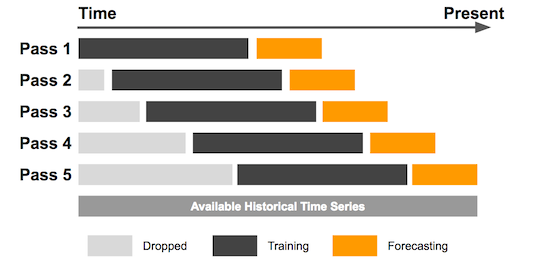

In [ ]:
# Membuat fungsi untuk melabelkan windowed data
# *data yang sudah di window di sematkan data horizon untuk di tebak

def get_labelled_windows(x, horizon = HORIZON):
  """
  Creates labels for Windowed dataset.

  Contoh untuk horizon = 1
  input = [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))


In [ ]:
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [ ]:
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


kalo yang diatas sudah melakukan windowing data tetapi itu hanya bekerja dalam data yang sedikit. DIbawah akan dilakukan hal serupa untuk keseluruhan data Nikkei225.

dapat dilakukan dengan for loops mengulkang yang diatas, tetapi akan lama untuk datasets berukuran besar. Uuntuk mempercepat akan digunakan Numpy array indexing

To speed things up, we'll leverage NumPy's array indexing. https://numpy.org/doc/stable/reference/arrays.indexing.html

Langkah-langkah membuat dataset ke dalam bentuk window dan horizon dengan menggunakan sliding window



1.   membuat interval window berdasarkan ukuran window (ex: [1,2,3,4,5,6,7])
2.   memanfaatkan numpy indexing untuk membuat array 2d dari banyak window steps. (ex :
```
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
 ```
3. dari indeks array 2D yang dibuat tahap 2, akan dimanfaatkan untuk memetakan value pada dataset (nikkei225) sesuai indeks yang sudah di window


Resource : Fungsi yang akan digunakan untuk mengimplementasikan sliding window sudah diadaptasi pada article berikut https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [ ]:
saham_nikkei225_penutupan[:2]

array([1282.380005, 1314.469971])

In [ ]:
# Membuat fungsi untuk mengenali Numpy arrays sebagai windows

def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  """
  mengubah 1D array menjadi 2D array window yang memiliki sequensial window sebesar window_size
  dan ukuran label sesuai dengan ukuran HORIZONS
  """
  # 1. membuat format window dan horizon sebesar ukuran window dan horizon
  window_step= np.expand_dims(np.arange(window_size + horizon), axis = 0)

  # 2. membuat banyak window steps berukuran 2D berukuran window size(-1 di ujung untuk kompensasi zero indeksing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon - 1)), axis = 0).T

  #print(f"Window indexes: \n {window_indexes, window_indexes.shape}")

  # 3. memetakan masing-masing indeks ke dalam target array (data time series) dengan 2D array of multiple window steps
  window_array = x[window_indexes]
  #print(windowed_array)

  # 4. memmisahkan masing2 aray 2D menjadi window dan horizon (label)
  windows, labels = get_labelled_windows(window_array, horizon = horizon)

  return windows, labels

In [ ]:
type(saham_nikkei225_penutupan)

numpy.ndarray

In [ ]:
full_windows, full_labels = make_windows(saham_nikkei225_penutupan, window_size = WINDOW_SIZE, horizon = HORIZON)


In [ ]:
# contoh hasil 3 windows dan label terakhir

for i in range(3):
  print(f"Windows: {full_windows[i]} -> Label: {full_labels[i]}")

Windows: [1282.380005 1314.469971 1312.73999  1313.180054 1318.109985 1330.72998
 1334.219971] -> Label: [1348.660034]
Windows: [1314.469971 1312.73999  1313.180054 1318.109985 1330.72998  1334.219971
 1348.660034] -> Label: [1355.48999]
Windows: [1312.73999  1313.180054 1318.109985 1330.72998  1334.219971 1348.660034
 1355.48999 ] -> Label: [1321.410034]


In [ ]:
# contoh hasil 3 windows dan label terakhir

for i in range(3):
  print(f"Windows: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Windows: [30991.689453 31949.890625 32568.109375 33585.199219 33625.53125
 33431.511719 32307.859375] -> Label: [32970.550781]
Windows: [31949.890625 32568.109375 33585.199219 33625.53125  33431.511719
 32307.859375 32970.550781] -> Label: [33169.050781]
Windows: [32568.109375 33585.199219 33625.53125  33431.511719 32307.859375
 32970.550781 33169.050781] -> Label: [33464.171875]


nilai 2912 didapat dari jumlah seluruh data yaitu 2919 dikurang dengan window_size + horizon -  1

In [ ]:
len(saham_nikkei225_penutupan)

2919

# Membagi data yang sudah diformat ke dalam windows dan labels menjadi training dan test sets

pembagian data ke dalam train dan test harus dilakukan dengan time  series split, tidak boleh dilakukan secara random split karena dapat menyebabkan data leakage, artinya data yang dari masa depan sudah dipelajari oleh model, sedangkan model bertujuan akan memprediksi data di masa depan sehingga data yang untuk test sudah diketahui oleh model menghasilkan model gagal untuk generalize dan menghasilkan prediksi yang bagus karena data testnya sudah di sontek saat learning


In [ ]:
def make_train_test_splits(windows, labels, test_split = 0.2):
  """
  melakukan split dari window dan label dari record data yang bersesuaian menjadi train dan test
  """
  split_size = int(len(windows) * (1- test_split)) # persentase train
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
len(full_windows), len(full_labels)

(2912, 2912)

In [ ]:
# create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2329, 583, 2329, 583)

In [ ]:
train_windows[:2], train_labels[:2]

(array([[1282.380005, 1314.469971, 1312.73999 , 1313.180054, 1318.109985,
         1330.72998 , 1334.219971],
        [1314.469971, 1312.73999 , 1313.180054, 1318.109985, 1330.72998 ,
         1334.219971, 1348.660034]]),
 array([[1348.660034],
        [1355.48999 ]]))

In [ ]:
test_windows[-2:], test_labels[-2:]

(array([[31949.890625, 32568.109375, 33585.199219, 33625.53125 ,
         33431.511719, 32307.859375, 32970.550781],
        [32568.109375, 33585.199219, 33625.53125 , 33431.511719,
         32307.859375, 32970.550781, 33169.050781]]),
 array([[33169.050781],
        [33464.171875]]))

In [ ]:
test_labels[:2]

array([[8933.05957 ],
       [9051.219727]])

In [ ]:
y_test[:2]

array([9002.679688, 8933.05957 ])

memastikan bahwa train labels sama setelah dan sebelum window split

INI BEDA DARI YANG TUTORIAL HARUSNYA TRUE TAPI GAPAPA MINOR DOANG

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

membuat checkpoint callback untuk menyimpan epoch terbaik saat training dan di load saat evaluasi

# membuat modelling checkpoint

karena model akan belajar terus menerus pada masing-masing epoch, diantara epoch-epoch tersebut dapat menghasilkan pembelajaran terbaik tidak hanya di eopch terakhir saja. Maka dari itu, epoch yang memiliki hasil terbaik akan di simpan selama training.  

Dengan menyimpan epoch yang terbaik, model yang akan dibuat adalah model yang terbaik dan dapat dibandingkan dengan model terbaik lainnya secara adil.

Untuk membuat modelling checkpoint callback digunakan: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
# membuat modelling checkpoint

import os # membuat folder untuk menyimpan best model

# mmebuat function untuk implementasi ModelCheckpoint callback
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                                                    verbose = 0,
                                                                    save_best_only = True)

# Model 1: Dense Model (window = 7, horizon =1)

first model adalah simple dense model:
* single dense layer dengan 128 hidden units and ReLU
* output layer dengan linear activation (no activation)
* adam optimization and MAE Loss function
* Batch size of 128
* 100 epochs

# !!!PENTING!!! Hyper parameter diatas dapat dituning dengan hyper parametr tuning tensorflow (LAKUKAN HYPERPARAMETER TUNING BELAKANGAN)


In [ ]:
# membuat model 1 dense layer

import tensorflow as tf
from tensorflow.keras import layers

# set random seed 42 untuk menghasilkan nilai yang konsisten tiap run
tf.random.set_seed(42)

# 1. Construct moodel

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation = "linear") #output yang dikeluarkan sama dengan output yang diterima
    #linear activation sama seperti tidak menggunakan activation karena output yang dikeluarkan tidak ada yang dirubah dari output hasil
 ], name = "model_1_dense") #memberi nama ke model untuk disimpan.

# 2. Compile
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. fit the model
# bagian memanfaatkan fungsi callback utnuk save best performance

model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)]) # ini addalah hyperparameter yang nanti bisa di tuning


Epoch 1/100
19/19 [==============================] - 2s 56ms/step - loss: 4983.5605 - mae: 4983.5605 - mse: 53682168.0000 - val_loss: 3531.1997 - val_mae: 3531.1997 - val_mse: 14565966.0000
Epoch 2/100
19/19 [==============================] - 1s 52ms/step - loss: 1100.6331 - mae: 1100.6331 - mse: 2551536.2500 - val_loss: 808.4446 - val_mae: 808.4446 - val_mse: 1173565.6250
Epoch 3/100
19/19 [==============================] - 1s 49ms/step - loss: 562.2488 - mae: 562.2488 - mse: 755446.6250 - val_loss: 786.4489 - val_mae: 786.4489 - val_mse: 1120303.5000
Epoch 4/100
19/19 [==============================] - 1s 49ms/step - loss: 473.2506 - mae: 473.2506 - mse: 575295.3125 - val_loss: 683.7877 - val_mae: 683.7877 - val_mse: 846002.1250
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 444.0365 - mae: 444.0365 - mse: 507173.9688 - val_loss: 685.6046 - val_mae: 685.6046 - val_mse: 829314.3750
Epoch 6/100
19/19 [==============================] - 0s 11ms/step - loss: 450.

model terbaik disimpan di asset

In [ ]:
# evaluasi epoch terakhir
# model dievaluasi dari test datanya
model_1.evaluate(test_windows, test_labels)

19/19 [==============================] - 0s 2ms/step - loss: 444.8870 - mae: 444.8870 - mse: 370792.2188


[444.8869934082031, 444.8869934082031, 370792.21875]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

19/19 [==============================] - 0s 2ms/step - loss: 444.8870 - mae: 444.8870 - mse: 370792.2188


[444.8869934082031, 444.8869934082031, 370792.21875]

## membuat forecast dengan model pada test dataset

forecast dilakukan pada test dataset yang mana termasuk psudo future. rentang waktu yang seakan2 berperan menyerupai data masa depan, karena data masa depan yang sebenarnya tidak akan bisa didapat karena belum terjadi.

1. memanfaatkan model yang sudah dilatih
2. gunakan input data yang polanya berasal dari time series yang sama dengan yang digunakan untuk melatih model
3. memberi input data tersebut ke model
4. prediksi keluar

In [ ]:
def make_preds(model, input_data): #input data berupa window dengan ukuran yang sama dengan ukuran window yang digunakan untuk melatih model
  """
  menggunakan model untuk membuat prediksi
  """

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# membuat prediksi dengan menggunakan model 1 pada test dataset:

model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

19/19 [==============================] - 0s 2ms/step


(583,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8896.408, 8983.213, 9090.216, 8936.99 , 9001.428, 9319.026,
        9477.828, 9647.247, 9804.797, 9948.692], dtype=float32)>)

In [ ]:
test_labels[:10]

array([[ 8933.05957 ],
       [ 9051.219727],
       [ 8757.599609],
       [ 9024.160156],
       [ 9366.799805],
       [ 9446.009766],
       [ 9527.389648],
       [ 9737.55957 ],
       [ 9940.05957 ],
       [10395.179688]])

membuat test_labels memiliki shape yang berjumlah dimensinya sama dengan model_1_preds

In [ ]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([583]), TensorShape([583]))

In [ ]:
# mengevaluasi prediksi dari model_1
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

In [ ]:
model_1_results

{'mae': 444.88696,
 'mse': 370792.16,
 'rmse': 608.92706,
 'mape': 2.1495757,
 'mase': 1.0367609,
 'R-square': 0.9881397505259527}

In [ ]:
naive_results

{'mae': 428.4958,
 'mse': 336595.47,
 'rmse': 580.16846,
 'mape': 2.07191,
 'mase': 0.99856305,
 'R-square': 0.9892335755994595}

In [ ]:
-len(test_windows)

-583

In [ ]:
np.array_equal(X_test[-len(test_windows):], X_test[:len(test_windows)])

False

In [ ]:
len(X_test[:len(test_windows)])

583

In [ ]:
len(X_test[-len(test_windows):])

583

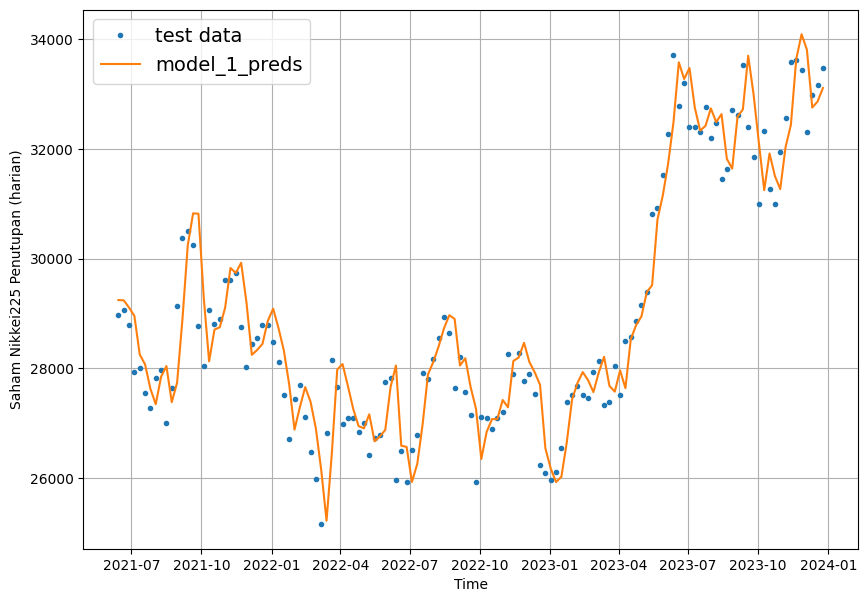

In [ ]:
# plot model 1 prediction dan visualisasi

offset = 450
plt.figure(figsize = (10,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                values = test_labels[:,0],
                start = offset,
                label = "test data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "model_1_preds")

# Model 2: Dense (window = 30, horizon = 1)

tetap menggunakan model sebelumnya, tetapi dengan window size 30.

akan menggunakan data saham nikkei225 30 hari sebelumnya untuk mencoba memprediksi harga saham nikkei225 satu hari setelahnya

mempersiapkan data dengan WINDOW_SIZE = 30

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(saham_nikkei225_penutupan, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2889, 2889)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2311, 578, 2311, 578)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
19/19 [==============================] - 1s 34ms/step - loss: 2122.8335 - val_loss: 1511.8717
Epoch 2/100
19/19 [==============================] - 0s 25ms/step - loss: 901.8305 - val_loss: 1035.8008
Epoch 3/100
19/19 [==============================] - 1s 38ms/step - loss: 690.7409 - val_loss: 898.2699
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 639.3287 - val_loss: 930.5115
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 634.4127 - val_loss: 922.7535
Epoch 6/100
19/19 [==============================] - 1s 37ms/step - loss: 549.9006 - val_loss: 873.4429
Epoch 7/100
19/19 [==============================] - 1s 39ms/step - loss: 540.4752 - val_loss: 873.1268
Epoch 8/100
19/19 [==============================] - 0s 6ms/step - loss: 525.9955 - val_loss: 896.4402
Epoch 9/100
19/19 [==============================] - 0s 27ms/step - loss: 500.6561 - val_loss: 744.4701
Epoch 10/100
19/19 [==============================] - 0s 5ms/ste

Evaluasi object model 2 dengan atribute evalulate untuk mendapatkan nilai mae

In [ ]:
model_2.evaluate(test_windows, test_labels)

19/19 [==============================] - 0s 2ms/step - loss: 600.1121


600.1121215820312

Evaluasi object model 2 dari hasil latihan epoch terbaik dengan cara load model terbaik dari model_experiments

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

19/19 [==============================] - 0s 2ms/step - loss: 502.5976


502.59759521484375

melakukan prediksi atau membuat prdiction value dengan model 2 dan mengevaluasi predicted value dengan true value dengan function evaluation helper function

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

19/19 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 502.59747,
 'mse': 458783.16,
 'rmse': 677.3353,
 'mape': 2.4102402,
 'mase': 1.1663246,
 'R-square': 0.9847966110988502}

bandingkan dengan arsitektur sama tetapi dengan ukuran window = 7

In [ ]:
model_1_results

{'mae': 444.88696,
 'mse': 370792.16,
 'rmse': 608.92706,
 'mape': 2.1495757,
 'mase': 1.0367609,
 'R-square': 0.9881397505259527}

**Does this mean a smaller window size is better? (I'll leave this as a challenge you can experiment with)**

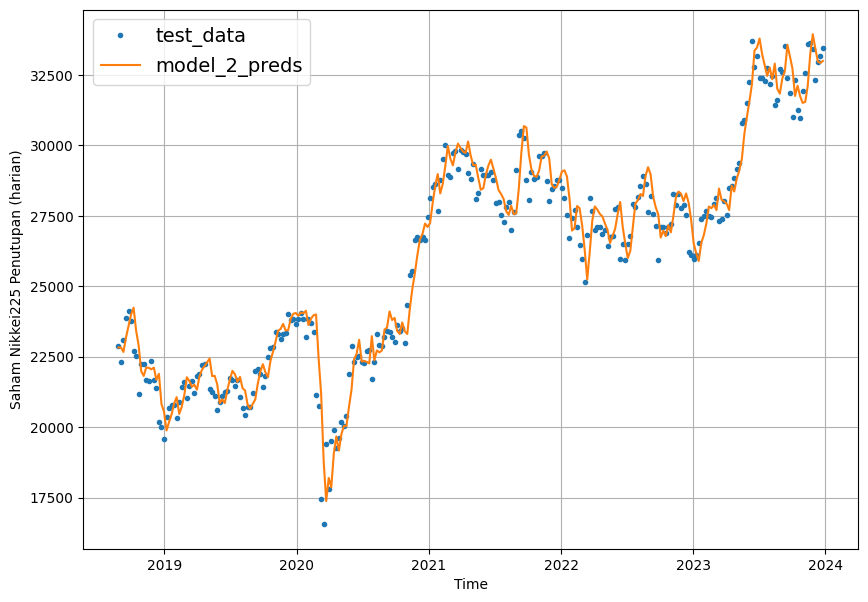

In [ ]:
# visualisasi predicted value dari model 2

offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

# Model 3: Dense (dengan window = 30 dan horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels =  make_windows(saham_nikkei225_penutupan, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2883, 2883)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2306, 577, 2306, 577)

In [ ]:
tf.random.set_seed(42)

# membuat model dense (sama spt sebelumnya dengan input size dan output size yang berbeda)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_3_dense")

# compile
model_3.compile(loss = "MAE",
                optimizer = tf.keras.optimizers.Adam())

# fit the data to model
model_3.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/100
19/19 [==============================] - 1s 35ms/step - loss: 4056.9648 - val_loss: 2624.9668
Epoch 2/100
19/19 [==============================] - 0s 27ms/step - loss: 1404.3163 - val_loss: 1488.3923
Epoch 3/100
19/19 [==============================] - 0s 26ms/step - loss: 1105.2015 - val_loss: 1370.3806
Epoch 4/100
19/19 [==============================] - 1s 33ms/step - loss: 1036.0090 - val_loss: 1346.9854
Epoch 5/100
19/19 [==============================] - 1s 37ms/step - loss: 983.4208 - val_loss: 1285.9309
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 926.0105 - val_loss: 1307.5010
Epoch 7/100
19/19 [==============================] - 1s 38ms/step - loss: 928.0897 - val_loss: 1243.5854
Epoch 8/100
19/19 [==============================] - 0s 6ms/step - loss: 867.5902 - val_loss: 1475.9601
Epoch 9/100
19/19 [==============================] - 1s 31ms/step - loss: 892.8408 - val_loss: 1176.6432
Epoch 10/100
19/19 [==============================] -

In [ ]:
# mengevaluasi model dari epoch terakhir dengan test data

model_3.evaluate(test_windows, test_labels)


19/19 [==============================] - 0s 2ms/step - loss: 930.9114


930.911376953125

In [ ]:
# load best version/epoch dari model 3
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

19/19 [==============================] - 0s 2ms/step - loss: 892.1710


892.1709594726562

Membuat prediksi dengan model 3 (menghasilkan prediction value yang akan di evaluasi dengan beberapa regression problem metrics)

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data = test_windows)

model_3_preds[-5:]

19/19 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[32028.543, 32021.738, 31769.457, 32202.568, 32246.768, 32407.445,
        32763.723],
       [32088.611, 31596.541, 31538.373, 31772.156, 32039.615, 32531.55 ,
        32421.914],
       [31773.758, 30915.662, 31010.375, 31343.652, 31389.982, 31764.047,
        31963.812],
       [31315.412, 31529.807, 31161.094, 31156.672, 31118.67 , 31631.207,
        32147.82 ],
       [31620.95 , 31720.225, 31228.217, 31488.617, 31542.443, 31833.203,
        33050.75 ]], dtype=float32)>

In [ ]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

#terdapat perbedaan shape (jumlah dimensi) saat data yang diprediksi lebih daari 1 horizon

(TensorShape([577, 7]), TensorShape([578]), TensorShape([583]))

In [136]:
# evaluate
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)

len(model_3_results["mae"])

577

In [ ]:
model_2_results["mae"], model_2_results["mae"].ndim

(502.59747, 0)

In [137]:
model_2_results["mae"].ndim

0

In [139]:
model_3_results["mae"].ndim #dimensi metrics lebih besar dari 0 karena horizon berukuran lebih dari satu

1

## membuat fungsi evaluasi yang dapat bekerja pada hoorizon berukuran lebih dari 1

In [141]:
tf.reduce_mean(model_3_results["mae"]).numpy()

892.1709

In [142]:
model_3.evaluate(test_windows, test_labels)

19/19 [==============================] - 0s 4ms/step - loss: 892.1710


892.1709594726562

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [ ]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  # mape akan digunakan, yang disarankan jangan digunakan adalah sMAPE
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # kalkulasi nilai R-square
  from sklearn.metrics import r2_score
  Rsquare = r2_score(y_true, y_pred)


  # memperhitungkan berbagai ukuran metrics
  # (artinya untuk horizon yang lebih besar akan menghasilkan metrics (ex: MAE) yang berukuran dimensi lebih besar,
  # sehingga perlu di lakukan tf.reduce_mean lebih lanjut supaya menghasilkan single value metrics)


  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "mase" : mase.numpy(),
          "R-square" : Rsquare}
